# Chapter 2

### Bias-Variance tradeoff: 

- The expected test MSE for a given $x_0$ can be divided into the variance of the model $\hat{f}(x_0)$, the squared bias of $\hat{f}(x_0)$, and the variance of the error term $\epsilon$:
\begin{equation}
    E(y_0 - \hat{f}(x_0))^2 = \text{Var}(\hat{f}(x_0)) + [\text{Bias}(\hat{f}(x_0))]^2 + \text{Var}(\epsilon)
\end{equation}
where in taking the average, we repteadly estimate $\hat{f}$ on multiple training sets, and test on the same $x_0$. Thus to minimize test error, we simultaneously want low bias and variance

- Variance captures amount that $\hat{f}$ would change if we used a different trainining set. If it is high, that means that the model has a tendancy to overfit to a training set. More flexible models have high variance.

- Bias is failure of the model to be complex enough to capture the actual phenomena we are studying. More flexible models have less bias. 

### Classification error rate: 
- On training or test set,
\begin{equation}
    \frac{1}{n}\sum_i I(y_i \neq \hat{f}(x_i)),
\end{equation}
where $I$ is an indicator function. Want to minimize error on the test set. 

- Test error minimized by Bayes classifer, assigns $x_0$ to class $j$ maximizing $P(Y = j|X = x_0)$. Resulting error rate is the Bayes error rate, which for specific test value is
\begin{equation}
    1 - \text{max}_j P(Y - j|X = x_0)
\end{equation}
Average over the whole test set to get the overall error rate

- Test error minimized by Bayes classifer, assigns $x_0$ to class $j$ maximizing $P(Y = j|X = x_0)$. Resulting error rate is the Bayes error rate, which for specific test value is
\begin{equation}
    1 - \text{max}_j P(Y - j|X = x_0)
\end{equation}
Average over the whole test set to get the overall error rate


### $K$-Nearest Neighbors
- Need methods to estiamte conditional probability to use the Bayes classifier.
    - Start with integer $K$ and test observation $x_0$. 
    - Identify $K$ points of the training set that are closest to $x_0$, call them $\mathcal{N}_0$
    - Compute $P(Y = j|X = x_0) = \frac{1}{K}\sum_{i\in \mathcal{N}_0}I(y_i = j)$ for all $j$
    
- Low K makes the model overly flexible. Low bias but high variance. High makes model rigid, with decision boundaries close to linear, high bias but low variance

### Exercise 8

In [34]:
from matplotlib.pyplot import subplots
import numpy as np

import pandas as pd

In [62]:
college = pd.read_csv('College.csv', index_col = 0);
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


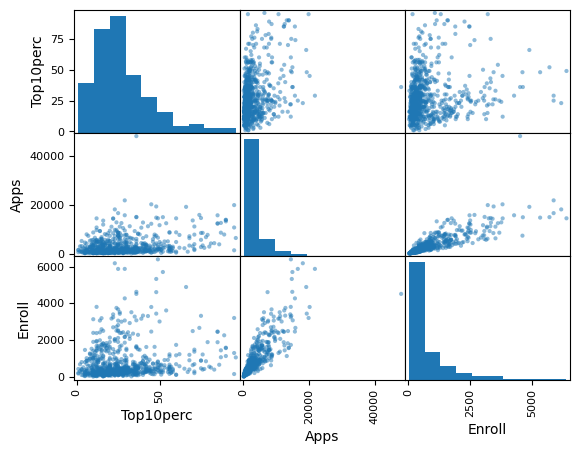

In [74]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']]);

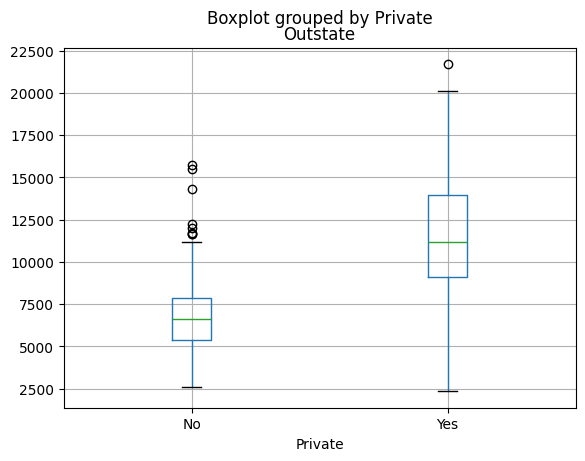

In [85]:
college.boxplot('Outstate', by = 'Private');

In [90]:
college['Elite'] = pd.cut(college['Top10perc']/100, [0,0.5,1], labels=['No', 'Yes'])
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,No
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,No
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,No
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Yes


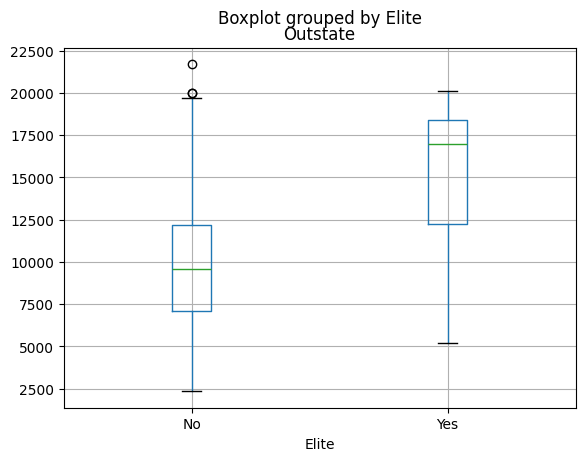

In [111]:
college['Elite'].value_counts()
college.boxplot('Outstate', by = 'Elite');

Text(0.5, 1.0, 'Outstate')

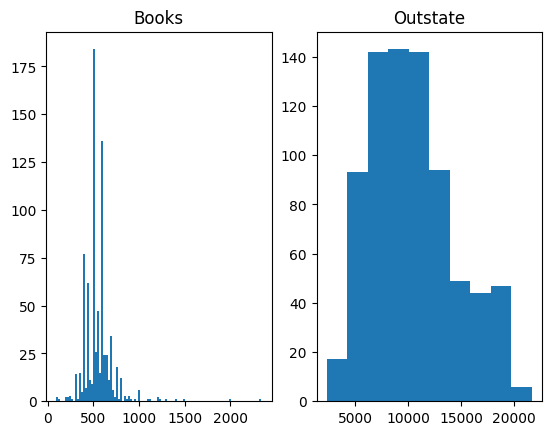

In [127]:
figure, ax = subplots(1,2)

ax[0].hist(college['Books'], bins = 100);
ax[1].hist(college['Outstate']);

ax[0].set_title('Books')
ax[1].set_title('Outstate')


### Exercise 9

In [128]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [134]:
#no missing values
Auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [163]:
#all quantitative
Auto.head(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [170]:
def give_range(df):

    range_dict = {}
    for index in df.columns:
        if type(df[index][0]) == str:
            continue
        else:
            rng = df[index].max() - df[index].min()
            range_dict[index] = rng
            
    return range_dict

give_range(Auto)

{'mpg': 37.6,
 'cylinders': 5,
 'displacement': 387.0,
 'horsepower': 184,
 'weight': 3527,
 'acceleration': 16.8,
 'year': 12,
 'origin': 2}

In [171]:
reduced_Auto = Auto.drop(range(10,85))

give_range(reduced_Auto)

{'mpg': 35.6,
 'cylinders': 5,
 'displacement': 387.0,
 'horsepower': 184,
 'weight': 3348,
 'acceleration': 16.3,
 'year': 12,
 'origin': 2}

In [172]:
reduced_Auto.mean()

/var/folders/by/7cbzhksj7t3d6f129n8csbb00000gn/T/ipykernel_23831/1659985223.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  reduced_Auto.mean()


mpg               24.374763
cylinders          5.381703
displacement     187.880126
horsepower       101.003155
weight          2938.854890
acceleration      15.704101
year              77.123028
origin             1.599369
dtype: float64

In [173]:
reduced_Auto.std()

/var/folders/by/7cbzhksj7t3d6f129n8csbb00000gn/T/ipykernel_23831/2324431290.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  reduced_Auto.std()


mpg               7.872565
cylinders         1.658135
displacement    100.169973
horsepower       36.003208
weight          811.640668
acceleration      2.719913
year              3.127158
origin            0.819308
dtype: float64

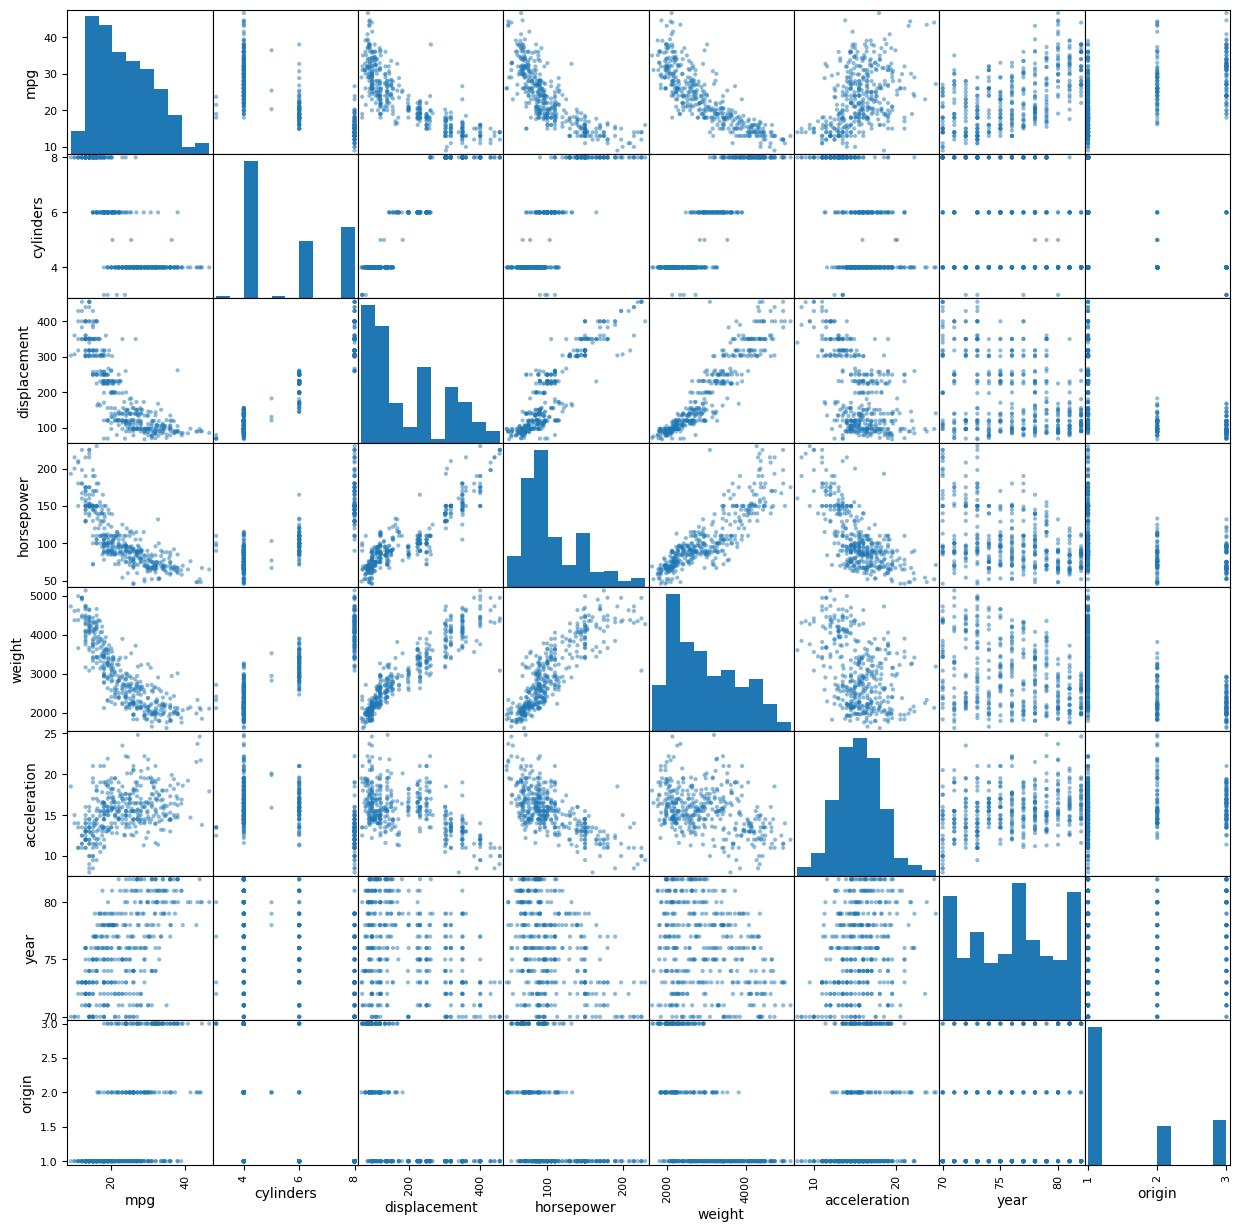

In [177]:
#Mode number of cars in 20 mpg range, 100 horse power range
#horsepower down as mpg up, hyperbolic descent
#Higher MPH cars have higher acceleration

#Displacement, horsepower, weight, acceleration, year, are all potentially good predictors of mpg

pd.plotting.scatter_matrix(Auto, figsize = (15,15));

### Exercise 10

In [178]:
from ISLP import load_data
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [186]:
print(len(Boston))
print(len(Boston.columns))
Boston.head(15)

506
13


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


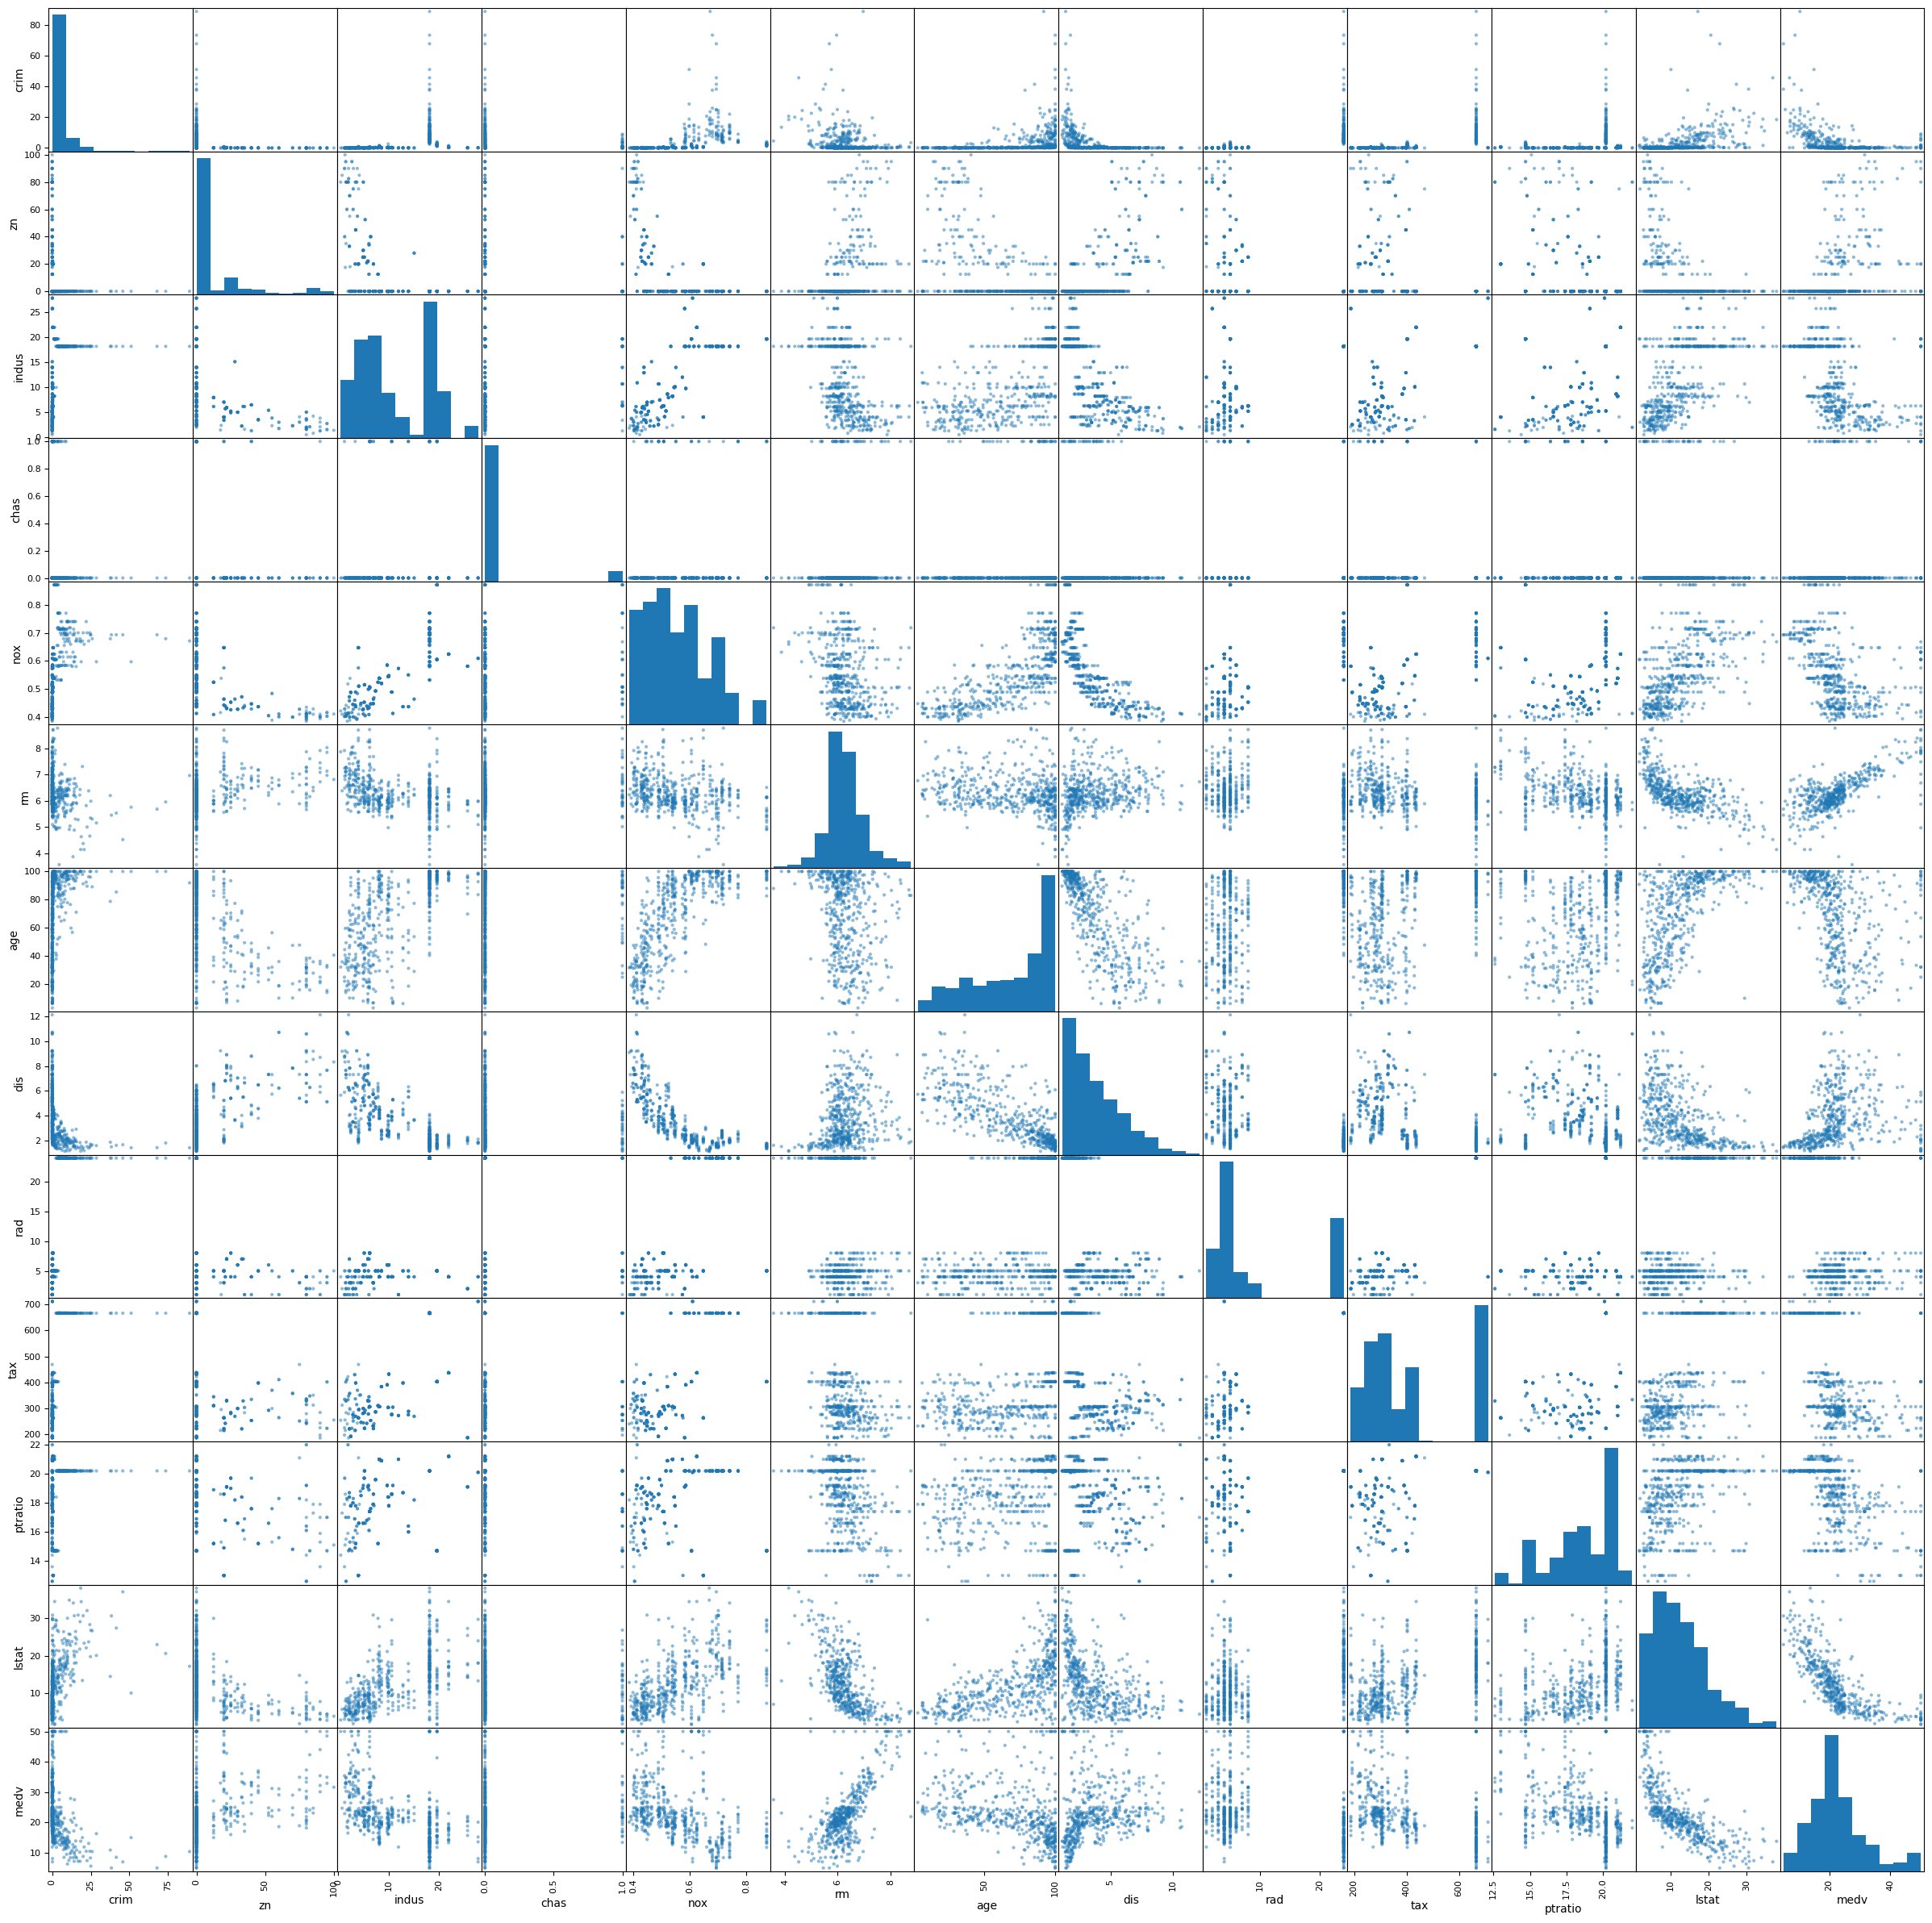

In [188]:
pd.plotting.scatter_matrix(Boston, figsize = (30,30));

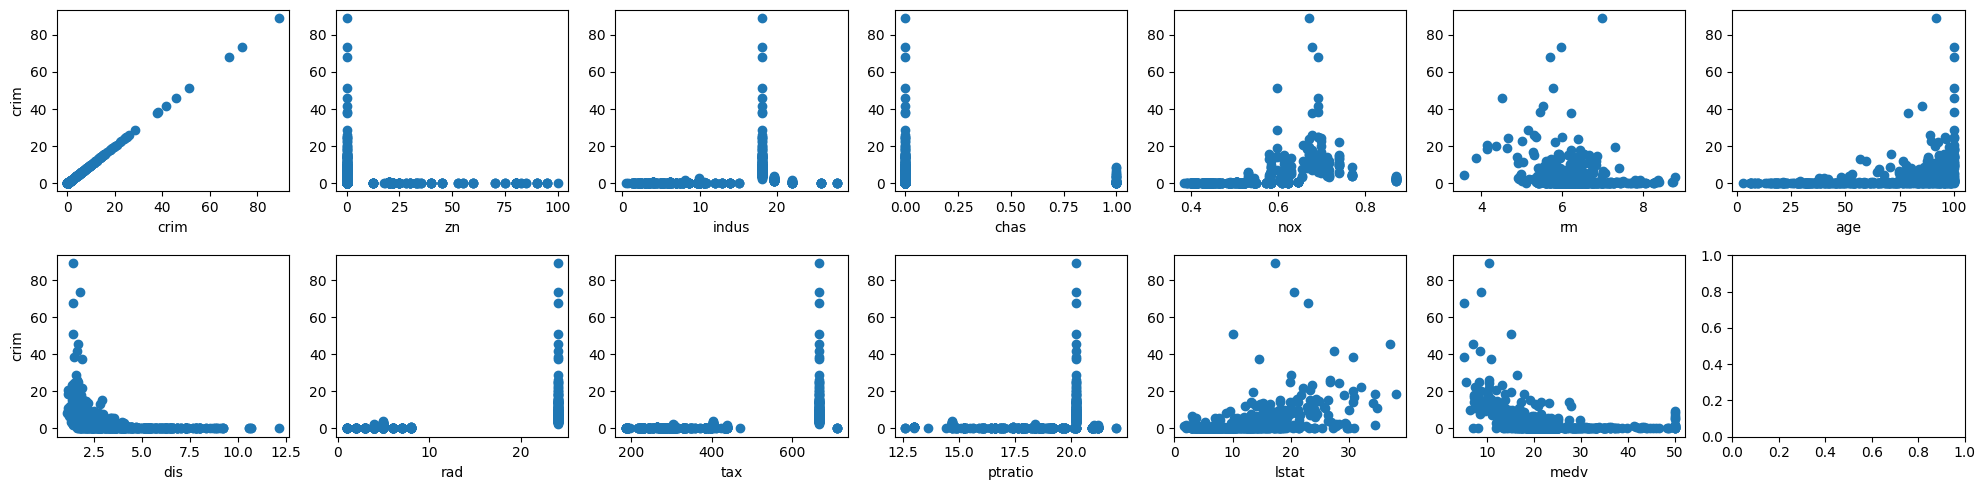

In [248]:
n_rows = 2
n_columns = 7
fig, ax = subplots(n_rows, n_columns, figsize = (20,5))

for ii in range(0, n_rows):
    for jj, index in enumerate(Boston.columns[ii*n_columns:(ii+1)*n_columns]):
        ax[ii, jj].scatter(Boston[index], Boston['crim'])
        ax[ii,jj].set_xlabel(index)
        
        if jj == 0:
            ax[ii,jj].set_ylabel('crim')

fig.tight_layout()



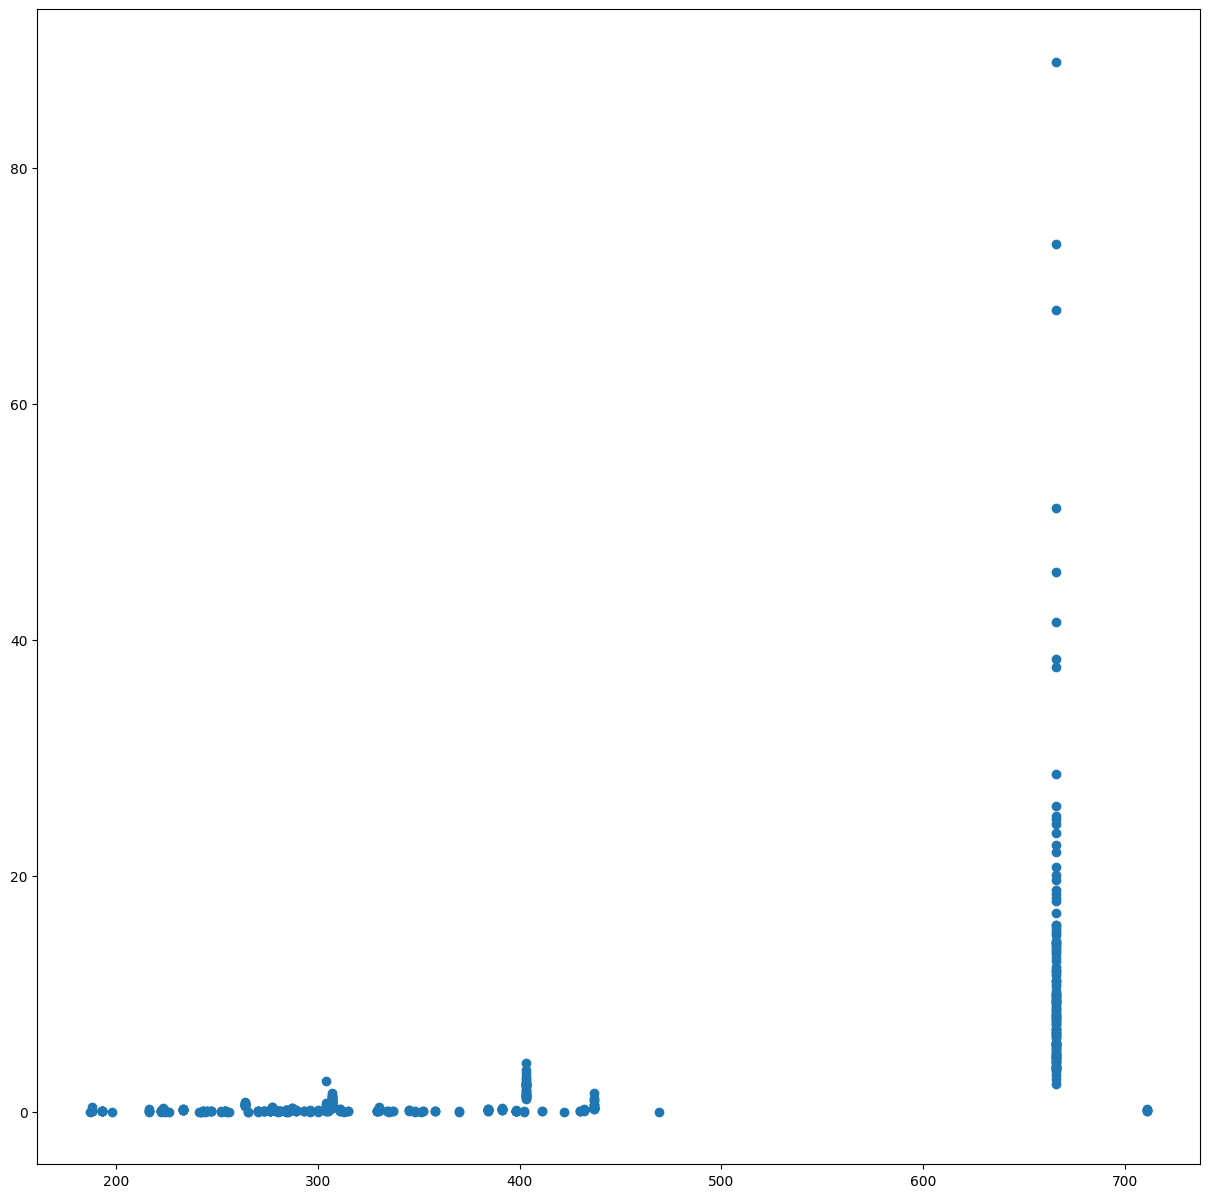

In [252]:
fig, ax = subplots(1, 1, figsize = (15,15))
ax.scatter(Boston['tax'], Boston['crim']);



In [253]:
give_range(Boston)

{'crim': 88.96988,
 'zn': 100.0,
 'indus': 27.279999999999998,
 'chas': 1,
 'nox': 0.486,
 'rm': 5.218999999999999,
 'age': 97.1,
 'dis': 10.9969,
 'rad': 23,
 'tax': 524,
 'ptratio': 9.4,
 'lstat': 36.24,
 'medv': 45.0}

In [255]:
Boston.median()

crim         0.25651
zn           0.00000
indus        9.69000
chas         0.00000
nox          0.53800
rm           6.20850
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
lstat       11.36000
medv        21.20000
dtype: float64

In [259]:
Boston.loc[Boston['medv']==Boston['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [264]:
print(len(Boston.loc[Boston['rm'] > 7]))
print(len(Boston.loc[Boston['rm'] > 8]))

many_rooms = Boston.loc[Boston['rm'] > 8]
many_rooms.head()

64
13


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0


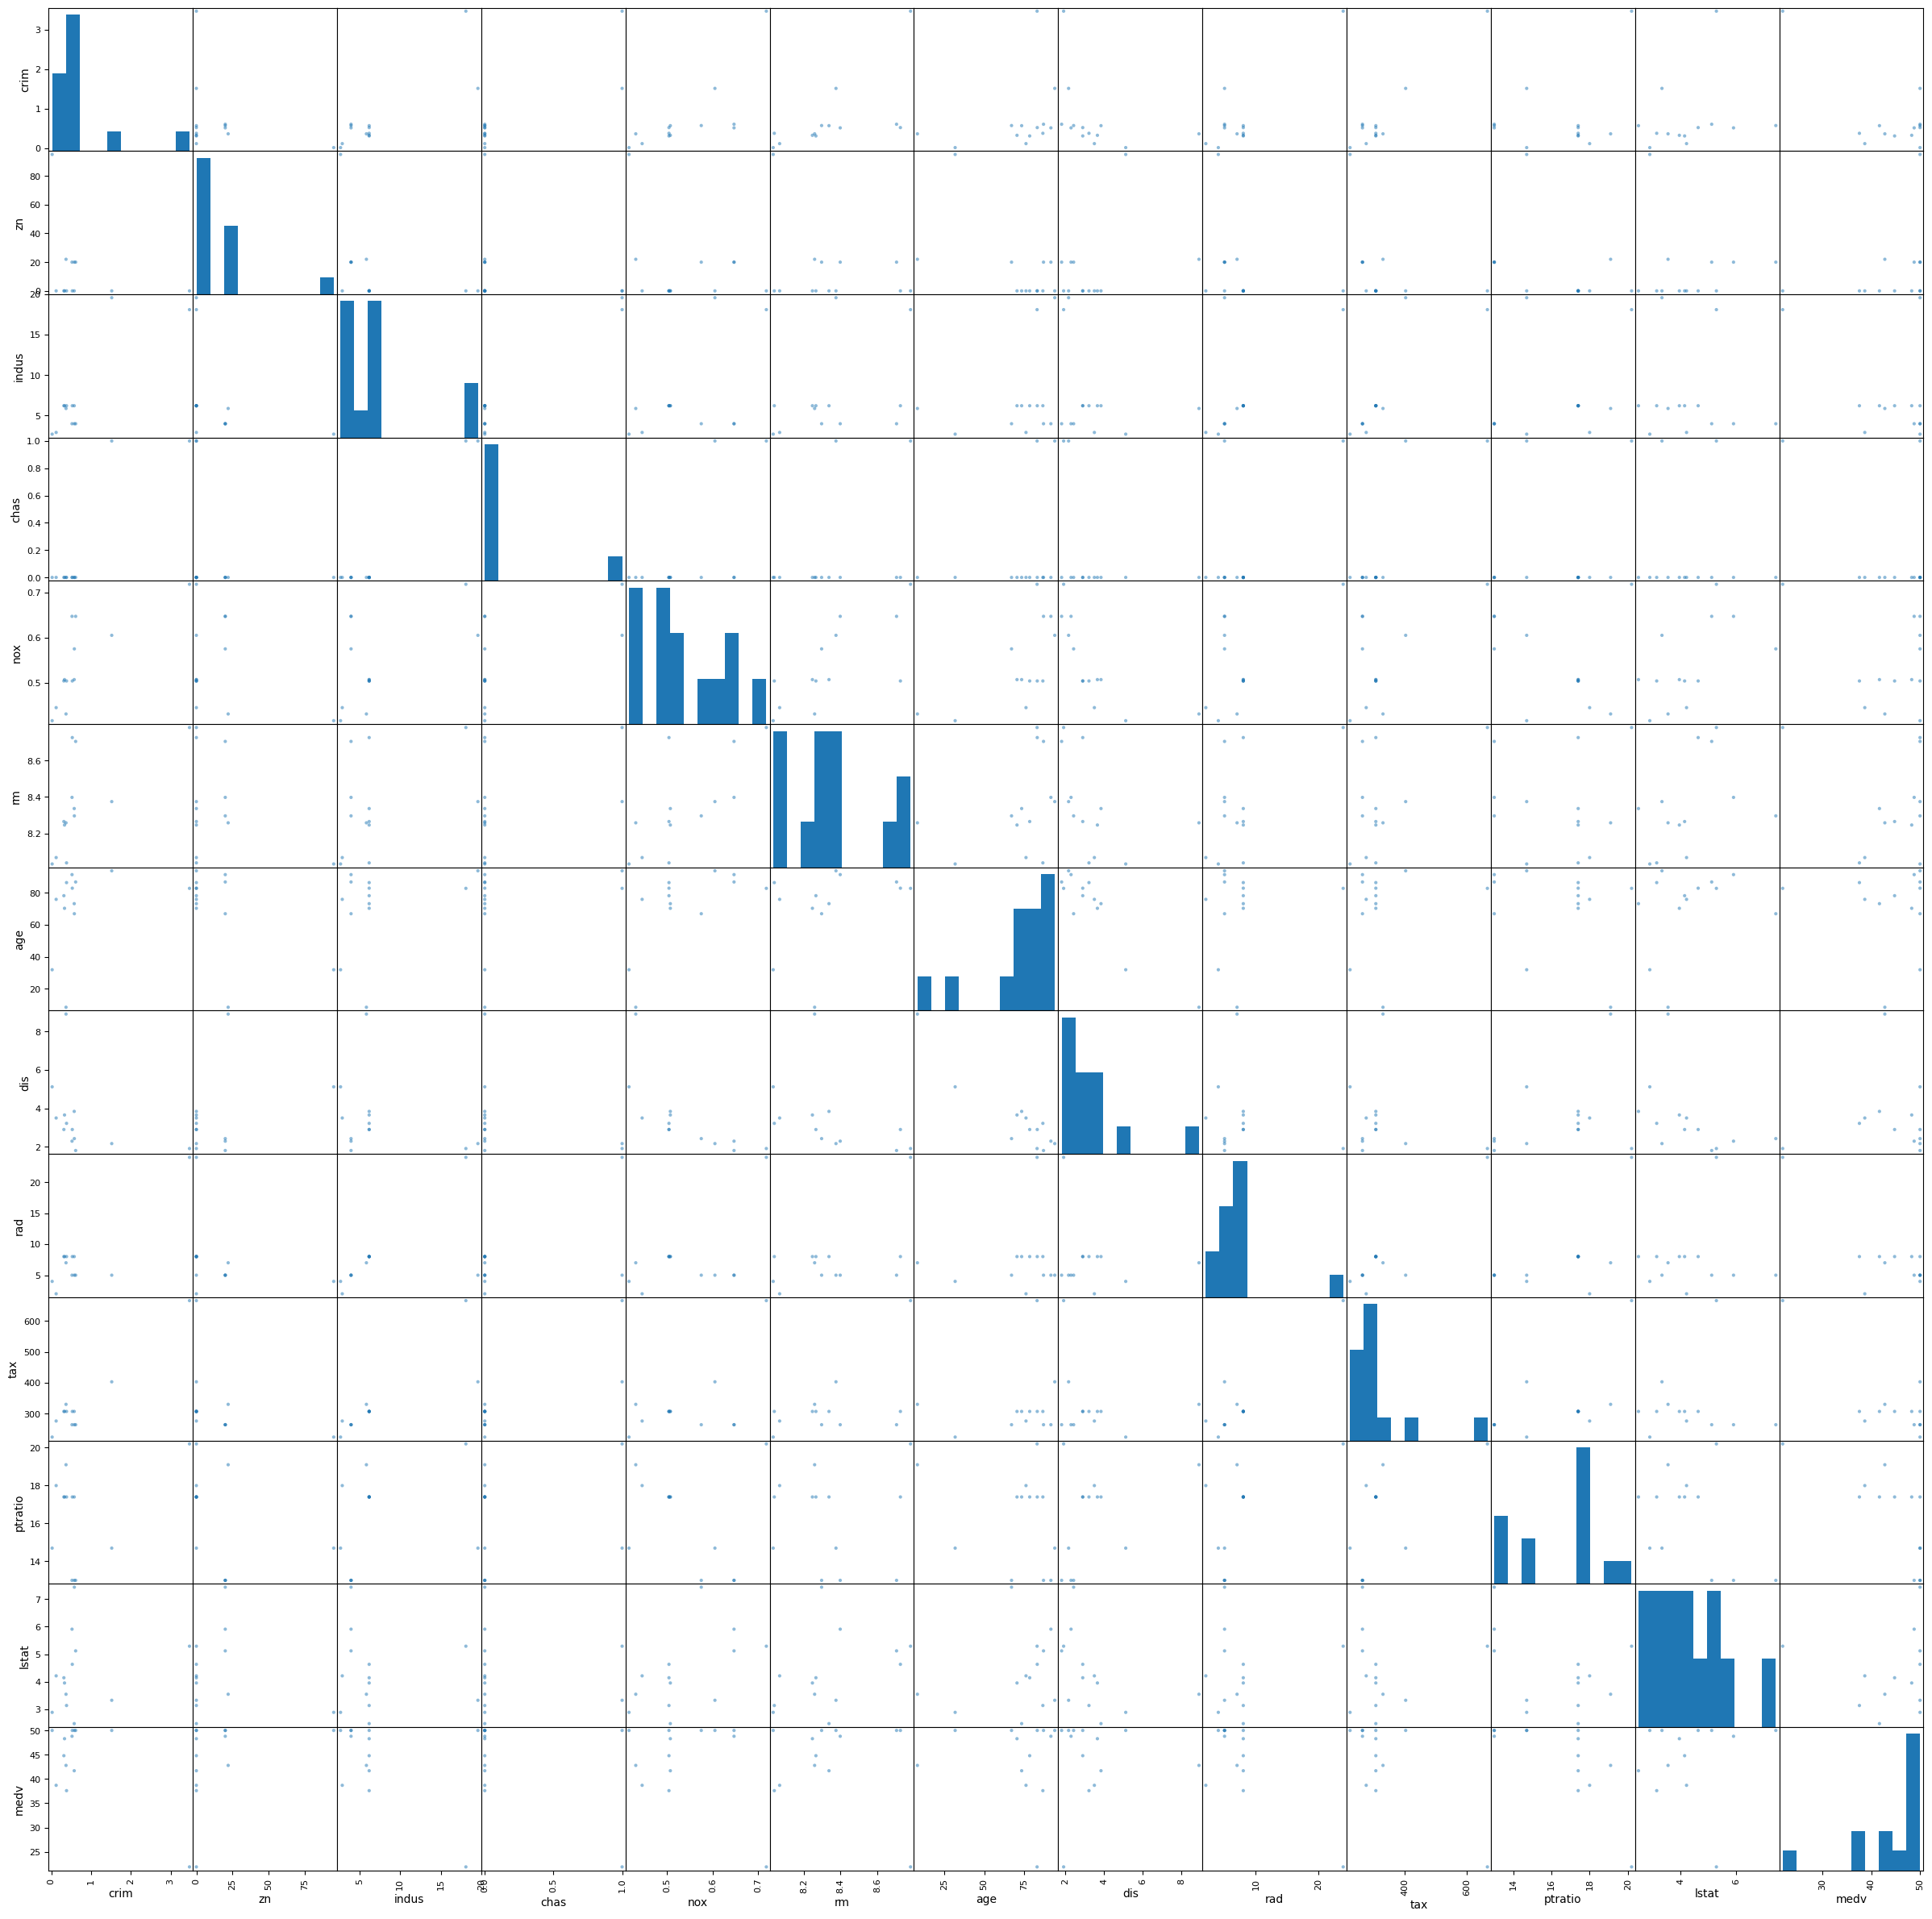

In [265]:
pd.plotting.scatter_matrix(many_rooms, figsize = (30,30));

### Exercise 1

(a) Flexible model; large data set prevents overfitting
(b) Inflexible model; inverse reason
(c) Flexible
(d) Inflexible, so as not to "model noise"

### Exercise 3
Bias decreases with increasing flexibility, variance increases with increasing flexibility, training error decreases with increasing flexibility, Bayes increases with flexibility (initially decreases)

### Exercise 7

In [857]:
x = np.array([[0,3,0,1],
              [2,0,0,1],
              [0,1,3,2],
              [0,1,2,-1],
              [-1,0,1,6],
              [1,-1,1,7]])

y = np.array(['Red', 'Red', 'Green', 'Green', 'Red', 'Green'])



In [865]:
import math as m

def K_smallest(x, K):
    
    #Given an input list x, returns the indicies of the K smallest elements 
    
    
    min_id = [None for i in range(K)]
    
    for i, x_el in enumerate(x):
        for j, min_id_el in enumerate(min_id):
            if (min_id_el is None) or x_el < x[min_id_el]:
                min_id.pop()
                min_id.insert(j, i)
                break
                        
    return min_id


def compute_distances(A,B):
    
    #Computes Euclidean distances between pairs of row vectors comprising array A 
    #and column vectors comprising array B
              
    A_square_mags = np.sum(A**2, axis=1, keepdims=True)
    B_square_mags = np.sum(B**2, axis=0, keepdims=True)
    
    A_dot_B = np.dot(x, B)
    
    square_dists = A_square_mags + B_square_mags-2*A_dot_B
    
    dists = np.sqrt(square_dists)
    
    return dists



def KNN_classifier(x, y, x_test, K):
    
    #KNN classifier
    #x is array comprised of row vectors of training data
    #y is 1 dimensional array of training data labels
    #x_test is array comprised of row vectors of test data
    
    
    if y.shape[0] != x.shape[0]:
        raise ValueError(f'different number of training labels ({y.shape[0]}) than training data ({x.shape[0]})')
    
    if K > x.shape[0]:
        K = x.shape[0]

    
    num_test_points = x_test.shape[0]    
        
    classes = list(set(y))

    probs = np.zeros((num_test_points, len(classes)))
    classification = np.full(num_test_points, 'acdefghijkl')
    nearest_neighbors = np.zeros((num_test_points, K), dtype=int)
    neighbor_classes = np.full((num_test_points, K), 'abcdefghijkl')
        
    distances = compute_distances(x, np.transpose(x_test))
    

    
    #for each test point, determine neigbors and their classes, compute probabilities, and classify
    for i in range(num_test_points):
        nearest_neighbors[i,:] = K_smallest(distances[:,i], K)
        neighbor_classes[i,:] = y[nearest_neighbors[i,:]]
        
        for j, el in enumerate(classes):
            probs[i,j] = sum([1 for idx in range(K) if neighbor_classes[i,idx]==el])/K
        
    classification = np.array(classes)[np.argmax(probs, axis=1).astype(int)]
         
            
    return classes, probs, classification


# Chapter 3: Linear Regression

- For model $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$, the regression coefficients are given by minimizing
\begin{equation}
    \text{RSS} = \sum_i (y_i - \hat{y}_i)^2 =  \sum_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2 
\end{equation}
which gives
\begin{equation}
    \hat{\beta}_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2}
\end{equation}
\begin{equation}
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}
\end{equation}
with an obvious generalization to case where $x$ is $m$ dimensional.

- True relationship is $Y = \beta_0 + \beta_1 X + \epsilon$. The $\beta_0$ and $\beta_!$ are unobservable without measuring the whole population, and are only approximated by the hatted quantities
- Using $\hat{\mu}$ is an unbiased estimator for $\mu$, the population mean, in the sense that if we average over many samples we expect to get $\mu$. Also true for $\hat{\beta}_0$ and $\hat{\beta}_1$ given by the expressions above
- Also have that the variance / standard error for $\hat{\mu} = \bar{y}$ given by 
\begin{equation}
    \text{Var}(\hat{\mu}) = \text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n}
\end{equation}
where $\sigma$ is standard devidation of each $y_i$, assuming uncorrelated. Average amount that $\hat{\mu}$ differs from $\mu$. For $\beta$'s, have
\begin{equation}
    \text{SE}(\hat{\beta}_0)^2 = \sigma^2\Big[\frac{1}{n}\frac{\bar{x}^2}{\sum_i(x_i - \bar{x})^2}\Big]
\end{equation}
\begin{equation}
    \text{SE}(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_i(x_i - \bar{x})^2}
\end{equation}
with $\sigma^2 = \text{Var}(\epsilon)$, assuming standard errors have same variance for each observation and are uncorrelated

- $\sigma^2$ generally not know, but can be estimated from the data. $\sigma = \sqrt{\text{RSS}/(n-2)}$

- Standard errors can be used to compute confidence intervals. $95\%$ confidence interval is range of values such that with $95\%$ probability, the range will contain the true known value of the parameter. For $\hat{\beta}_1$ is 
\begin{equation}
    \hat{\beta}_1 \pm 2 \text{ SE}(\hat{\beta}_1)
\end{equation}
Similar for $\beta_0$.

- Hypothesis testing. Null hypothesis $H_0$: There is no relationship between $X$ and $Y$. Alternative hypothesis $H_a$: There is some relationship between $X$ and $Y$. Can be expressed as 
\begin{equation}
    H_0: \beta_1 = 0\hspace{1 cm} H_a: \beta_1 \neq 0
\end{equation}
we need to determine whether $\beta_1$ is far enough away from zero to be confident $\beta_1$ is not zero. Depends on the accuracy that we measured it with, SE$({\beta})$. If SE$(\beta_1)$ small, then we can be relatively certain even if $\hat{\beta}_1$ small. If standard error large, sample $\beta_1$ must be high to reject $H_0$. Use the $t$-statistic
\begin{equation}
    t = \frac{\hat{\beta}_1 - 0}{\text{SE}(\hat{\beta}_1)},
\end{equation}
which will have $t$ distribution with $n-2$ degrees of freedom if there really is no relationship between $X$ and $Y$. $t$-distribution looks like normal distributino if $n > 30$ or so. Probability that $|t| > p$ assuming null hypothesis is the $p$-value. Small $p\implies$ we can reject the null hypothesis

- Once we have rejected the null hypothesis, want to quantify the extent to which the model fits the data.
\begin{equation}
    \text{RSE} = \sqrt{\frac{1}{n-2}\text{RSS}}
\end{equation}
Measure of lack of fit. Another metric is
\begin{equation}
    R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}}, \hspace{1 cm} \text{TSS} = \sum_i(y_i - \bar{y})^2
\end{equation}
TSS is amount of variance in $Y$ before regression performed. RSS is amount of variance after the regression is performed. overall $R^2$ measures the percent "reduction" in variance of $Y$ which comes from doing the regression. Or, the portion of the original variance that can be explained using $X$. If $R^2$ low, could be that $\sigma^2$ is higher, the linear model is wrong, or both.
- Correlation given by 
\begin{equation}
    r = \text{Cor}(X, Y) = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i(x_i - \bar{x})^2\sum_i(y_i - \bar{y})^2}}
\end{equation}
Also good measure of relationship. In linear regression setting with single variable $R^2 = r^2$.

In [869]:
advertising = pd.read_csv('Advertising.csv', index_col = 0);
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [871]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Linear Regression

In [ ]:
#class that computes lines and slope of data using RSS
#class can take in new data, apply that fit, and make a prediction



### Bayes classifiers

### AUC curve